# Instagram Users Around the World

## Introduction

This data set combines Instagram user behavioral data from different countries around the world along with health, lifestyle, and demographic characteristics. It has 57 columns, 30 of which contain user metrics such as **daily_active_minutes_instagram** and **sessions_per_day**.

Given this extensive dataset, we can ask some initial questions, such as:
- Where are most users of Instagram located (which countries)? Where is most user-generated content being produced?
- What is the distribution of ages of the app's users? What about other characteristics?
- Does Instagram usage correlate with health, happiness, and demographic information included in the dataset?

*Note: This is a synthetic dataset from Kaggle.*

## Data Wrangling and First Look

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv('./instagram_usage_lifestyle.csv')

In [21]:
df.head()

,user_id,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
0,1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
1,2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
2,3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
3,4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
4,5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


In [22]:
df.columns

Index(['user_id', 'app_name', 'age', 'gender', 'country', 'urban_rural',
       'income_level', 'employment_status', 'education_level',
       'relationship_status', 'has_children', 'exercise_hours_per_week',
       'sleep_hours_per_night', 'diet_quality', 'smoking', 'alcohol_frequency',
       'perceived_stress_score', 'self_reported_happiness', 'body_mass_index',
       'blood_pressure_systolic', 'blood_pressure_diastolic',
       'daily_steps_count', 'weekly_work_hours', 'hobbies_count',
       'social_events_per_month', 'books_read_per_year',
       'volunteer_hours_per_month', 'travel_frequency_per_year',
       'daily_active_minutes_instagram', 'sessions_per_day',
       'posts_created_per_week', 'reels_watched_per_day',
       'stories_viewed_per_day', 'likes_given_per_day',
       'comments_written_per_day', 'dms_sent_per_week',
       'dms_received_per_week', 'ads_viewed_per_day', 'ads_clicked_per_day',
       'time_on_feed_per_day', 'time_on_explore_per_day',
       'time_on_

In [23]:
df = df.set_index('user_id')

In [24]:
df.head()

,app_name,age,gender,country,urban_rural,income_level,employment_status,education_level,relationship_status,has_children,...,last_login_date,average_session_length_minutes,content_type_preference,preferred_content_theme,privacy_setting_level,two_factor_auth_enabled,biometric_login_used,linked_accounts_count,subscription_status,user_engagement_score
user_id,,,,,,,,,,,,,,,,,,,,,
1,Instagram,51,Female,India,Rural,High,Retired,Bachelor’s,Single,No,...,2025-11-02,5.0,Mixed,Tech,Private,Yes,No,0,Free,7.83
2,Instagram,64,Female,United Kingdom,Urban,Middle,Full-time employed,Other,Divorced,No,...,2025-03-22,14.8,Photos,Fashion,Public,No,No,3,Free,1.43
3,Instagram,41,Female,Canada,Urban,Middle,Student,Bachelor’s,In a relationship,No,...,2025-08-10,5.0,Mixed,Other,Public,Yes,Yes,1,Free,9.67
4,Instagram,27,Non-binary,South Korea,Urban,Middle,Unemployed,Master’s,In a relationship,No,...,2025-03-31,25.9,Stories,Tech,Private,No,No,1,Free,0.94
5,Instagram,55,Male,India,Urban,Upper-middle,Full-time employed,Bachelor’s,Single,No,...,2025-03-19,13.1,Videos,Food,Public,Yes,No,0,Free,1.03


In [25]:
df = df.convert_dtypes()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1547896 entries, 1 to 1547896
Data columns (total 57 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   app_name                        1547896 non-null  string 
 1   age                             1547896 non-null  Int64  
 2   gender                          1547896 non-null  string 
 3   country                         1547896 non-null  string 
 4   urban_rural                     1547896 non-null  string 
 5   income_level                    1547896 non-null  string 
 6   employment_status               1547896 non-null  string 
 7   education_level                 1547896 non-null  string 
 8   relationship_status             1547896 non-null  string 
 9   has_children                    1547896 non-null  string 
 10  exercise_hours_per_week         1547896 non-null  Float64
 11  sleep_hours_per_night           1547896 non-null  Float64
 12  diet_

In [27]:
has_missing = df.isnull().values.any()
has_missing

False

The dataframe has no missing values and is ready to visualize.

## User Data by Country

In [28]:
df.country.value_counts(normalize = True).sort_values(ascending = False)

country
United States     0.249906
India              0.17982
Brazil             0.12033
Other             0.099859
United Kingdom    0.079728
Canada            0.070149
Australia         0.059773
South Korea       0.050423
Germany           0.049957
Japan             0.040054
Name: proportion, dtype: Float64

In [29]:
.249906+.17982

0.429726

We can see that the United States and India are the biggest users of Instagram by far, maybe because of their large populations. Almost 43% of the users are from these two countries. However, all the countries and the "Other" category have similar mean daily active minutes, and the top means are from Australia, India, and the UK. The U.S. is closer to the bottom of this list.

(-1.5, 1.5)

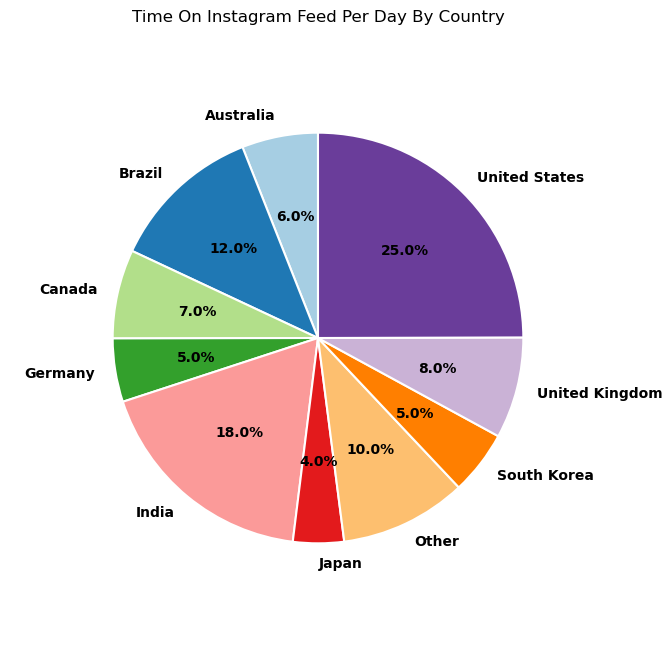

In [37]:
grouped_s = df.groupby('country')['daily_active_minutes_instagram'].sum()

ax = grouped_s.plot.pie(
    legend = False,
    figsize=(8, 8), 
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'fontweight': 'bold'},
    colors=plt.cm.Paired.colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    title='Time On Instagram Feed Per Day by Country'
)

ax.set_ylabel('') #Remove y-axis label inside the plot
ax.set_xlim([-1.5, 1.5]) 
ax.set_ylim([-1.5, 1.5]) 

In [38]:
grouped_s_2 = df.groupby('country')['daily_active_minutes_instagram'].mean()

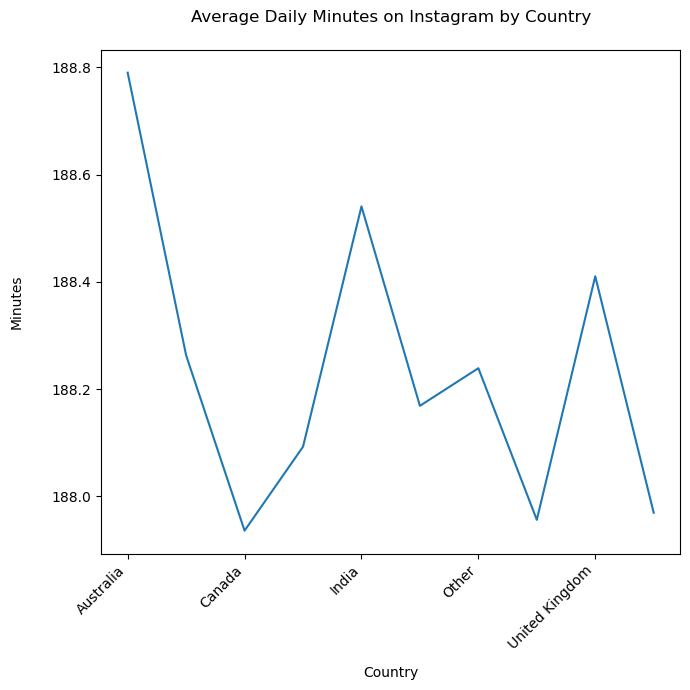

In [51]:
ax2 = grouped_s_2.plot(figsize = (7,7))
ax2.set_title('Average Daily Minutes on Instagram by Country', pad = 20)
ax2.set_xlabel('Country', labelpad=10)
ax2.set_ylabel('Minutes', labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [40]:
grouped_s_2.head(10).sort_values(ascending = False)

country
Australia          188.79018
India             188.540788
United Kingdom    188.410433
Brazil            188.263108
Other             188.239028
Japan             188.168825
Germany           188.092591
United States     187.969467
South Korea       187.956259
Canada            187.936031
Name: daily_active_minutes_instagram, dtype: Float64

In this dataset the number of posts per week follows the same pattern as the active minutes per day on Instagram; the top countries producing content are the U.S., India, and Brazil as well. This may just be because the data is synthetic. It would be interesting to compare the different countries' time spent consuming content or otherwise engaging with the Instagram app to number of actual posts per week in real life.

The top posters by mean posts per week are India, Canada, and S. Korea.

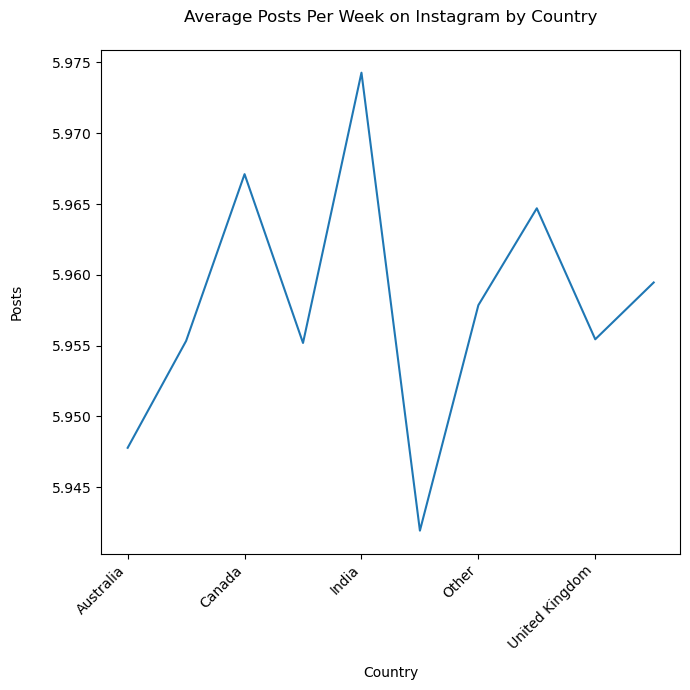

In [56]:
grouped_s_3 = df.groupby('country')['posts_created_per_week'].mean()

ax3 = grouped_s_3.plot(figsize = (7,7))
ax3.set_title('Average Posts Per Week on Instagram by Country', pad = 20)
ax3.set_xlabel('Country', labelpad=10)
ax3.set_ylabel('Posts', labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [57]:
grouped_s_3.head(10).sort_values(ascending = False)

country
India              5.97428
Canada            5.967113
South Korea       5.964702
United States     5.959463
Other             5.957858
United Kingdom     5.95545
Brazil            5.955336
Germany           5.955191
Australia         5.947785
Japan             5.941935
Name: posts_created_per_week, dtype: Float64

Making a boxplot, we can see that the number of posts per week looks pretty similar across countries. All of them have the majority of users mostly consuming content or messaging, with some very high posting outliers.

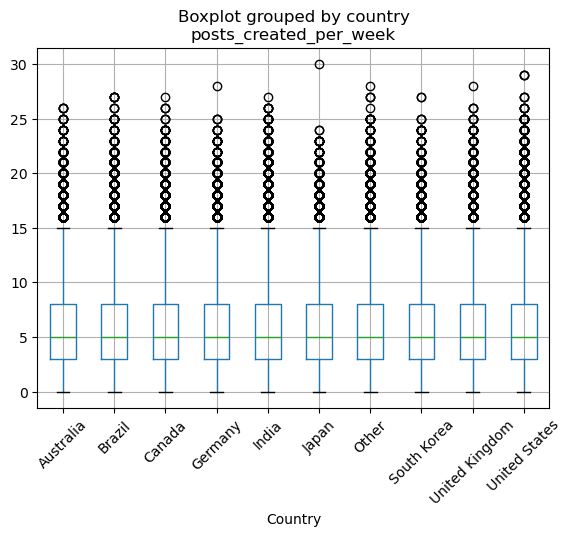

In [59]:
boxplot = df.boxplot(column=['posts_created_per_week'], by = 'country', rot =45, xlabel = 'Country')

## Looking at Instagram Habits by Age, Employment Status, Education Level, etc.

The age of users in this dataset is actually pretty evenly distributed, ranging from 13-65 with a mean of 38.98. 

In [104]:
df.describe()

,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,weekly_work_hours,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
count,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,...,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0,1547896.0
mean,38.98544,7.14348,6.999384,19.987738,5.499804,25.000837,124.491714,79.500074,8000.104562,40.001454,...,37.620369,32.952025,56.476622,2160.542605,2604.941554,0.50024,2017.500762,20.509713,1.975254,1.644642
std,15.294528,3.994556,1.097098,11.832578,2.871232,3.976188,20.206989,11.54874,89.397615,9.99732,...,25.357877,21.445688,35.347818,3402.015893,2751.922314,0.288783,4.611735,8.697454,1.352058,1.812684
min,13.0,0.0,3.0,0.0,1.0,15.0,90.0,60.0,7566.0,0.0,...,1.0,1.0,1.0,10.0,20.0,0.0,2010.0,5.0,0.0,0.67
25%,26.0,4.0,6.3,10.0,3.0,22.3,107.0,70.0,7940.0,33.2,...,18.0,16.0,29.0,543.0,663.0,0.25,2013.0,13.3,1.0,1.0
50%,39.0,6.6,7.0,20.0,5.0,25.0,124.0,79.0,8000.0,40.0,...,34.0,31.0,54.0,1154.0,1519.0,0.5,2017.0,20.4,2.0,1.1
75%,52.0,9.7,7.7,30.0,8.0,27.7,142.0,90.0,8060.0,46.8,...,53.0,47.0,80.0,2459.0,3451.0,0.75,2022.0,27.6,3.0,1.29
max,65.0,24.1,10.0,40.0,10.0,45.0,159.0,99.0,8473.0,80.0,...,171.0,138.0,222.0,208811.0,10000.0,1.0,2025.0,52.0,5.0,18.67


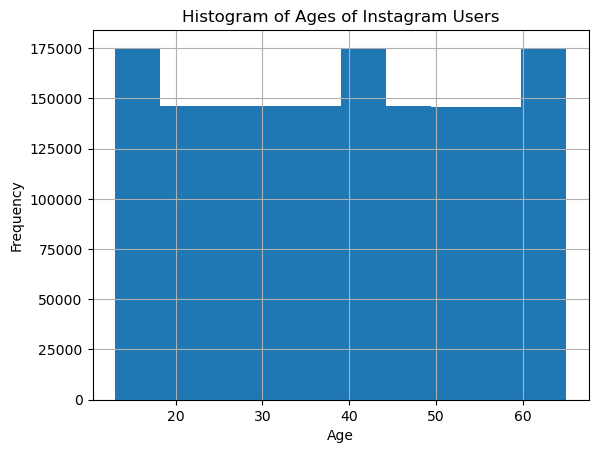

In [135]:
df['age'].hist()

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages of Instagram Users')
plt.show()

<Axes: xlabel='Employment Status', ylabel='Total Time (minutes)'>

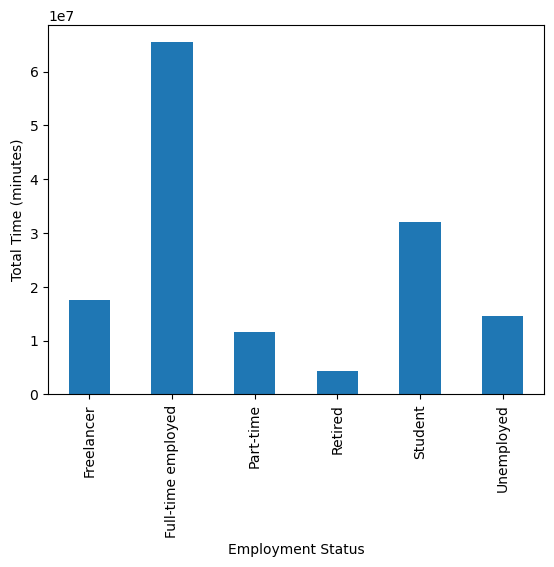

In [136]:
df.groupby('employment_status')['time_on_feed_per_day'].sum().plot.bar(xlabel = 'Employment Status', ylabel = 'Total Time (minutes)')

<Axes: xlabel='Education Level', ylabel='Total Time (minutes)'>

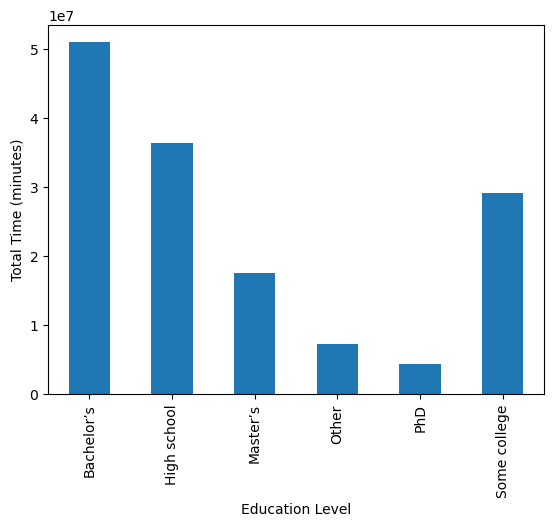

In [137]:
df.groupby('education_level')['time_on_feed_per_day'].sum().plot.bar(xlabel = 'Education Level', ylabel = 'Total Time (minutes)')

<Axes: xlabel='Relationship Status', ylabel='Total Time (minutes)'>

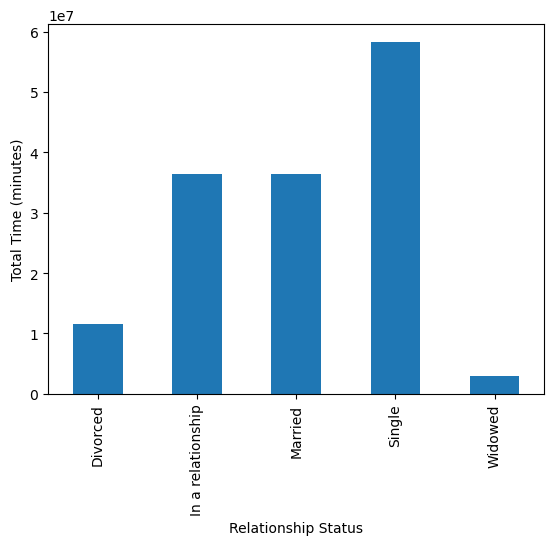

In [138]:
df.groupby('relationship_status')['time_on_feed_per_day'].sum().plot.bar(xlabel = 'Relationship Status', ylabel = 'Total Time (minutes)')

<Axes: xlabel='Has Children', ylabel='Total Time (minutes)'>

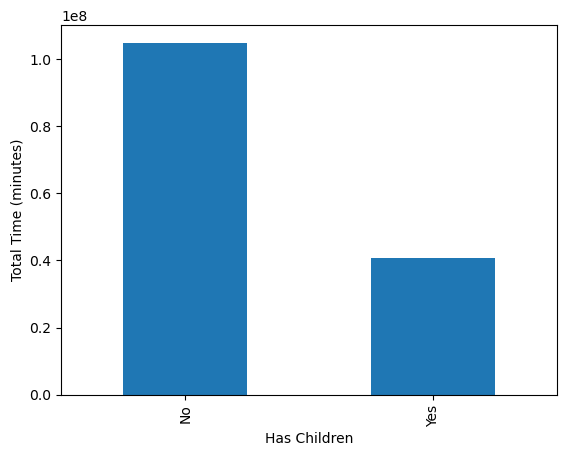

In [139]:
df.groupby('has_children')['time_on_feed_per_day'].sum().plot.bar(xlabel = 'Has Children', ylabel = 'Total Time (minutes)')

<Axes: xlabel='Income Level', ylabel='Total Time (minutes)'>

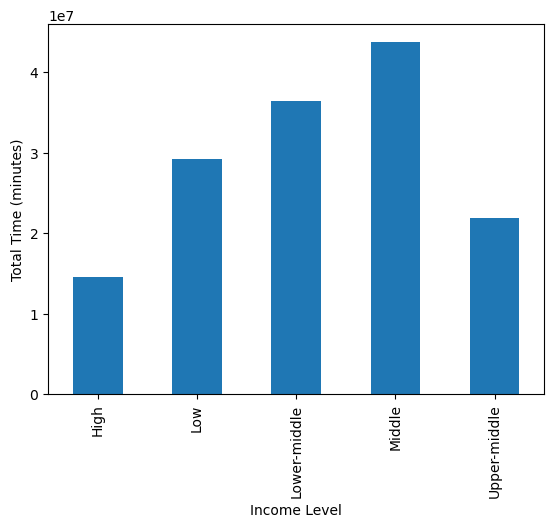

In [140]:
df.groupby('income_level')['time_on_feed_per_day'].sum().plot.bar(xlabel = 'Income Level', ylabel = 'Total Time (minutes)')

<Axes: xlabel='Gender', ylabel='Total Time (minutes)'>

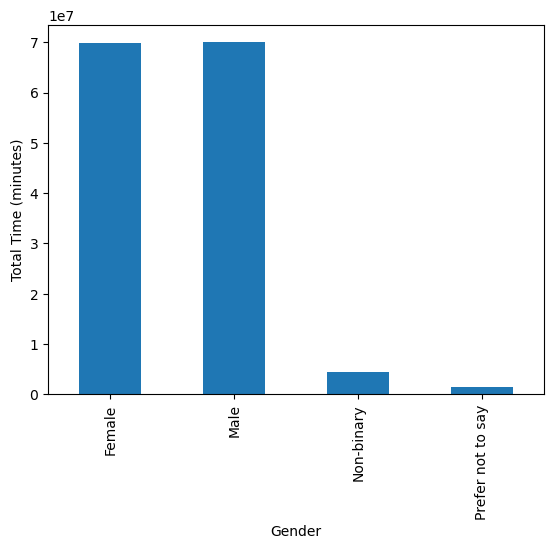

In [141]:
df.groupby('gender')['time_on_feed_per_day'].sum().plot.bar(xlabel = 'Gender', ylabel = 'Total Time (minutes)')

So most of the active time (minutes) spent on Instagram is spent by people who are full-time employed with a bachelors degree, have some college, or a high school education. Those who are single spent more time than those who are not and people without children spent more time than those without (which is not surprising). More time was spent by users at a middle income level than any other level. Time seems to be evenly split by gender (since the non-binary and "prefer not to say" categories are so small we may guess that they're just proportional to their populations, but it would be interesting to explore in more detail). 

How often are users actually posting?

<Axes: xlabel='Weekly Posts', ylabel='Frequency'>

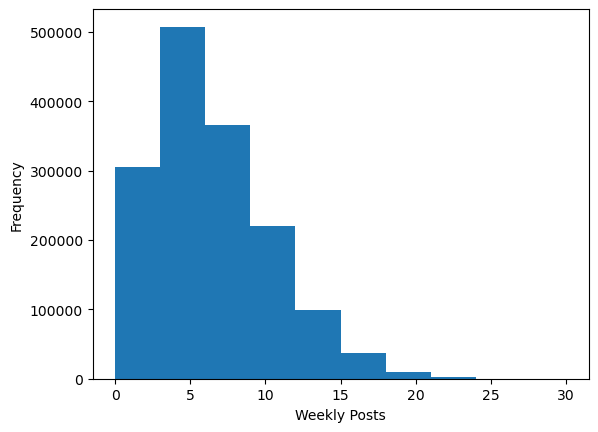

In [142]:
df['posts_created_per_week'].plot(kind = 'hist', xlabel = 'Weekly Posts')

The most common number of posts is 5 per week and the data is definitely skewed, with users who post a lot being more rare.

Lastly, let's plot an overlapping histogram of the total daily time (in minutes) spent on each of Instagram's features/activities: Feed, Reels, Messaging, and Explore.

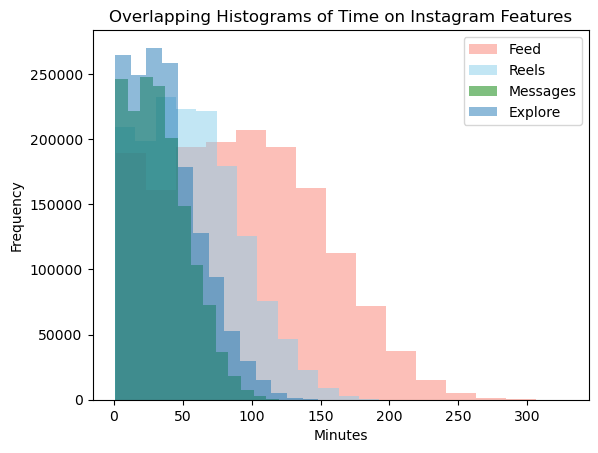

In [143]:
#plt.hist(df['daily_active_minutes_instagram'], bins=15, alpha=0.5, label='Total Active Minutes')
plt.hist(df['time_on_feed_per_day'], bins=15, alpha=0.5, color='salmon', label='Feed')
plt.hist(df['time_on_reels_per_day'], bins=15, alpha=0.5, color='skyblue', label='Reels')
plt.hist(df['time_on_messages_per_day'], bins=15, alpha=0.5, color='green', label='Messages')
plt.hist(df['time_on_explore_per_day'], bins=15, alpha=0.5, label='Explore')

# Add labels, title, and legend
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Overlapping Histograms of Time on Instagram Features')
plt.legend()
plt.show()

## Correlations

Creating a heatmap to look for correlations between Instagram use and other characteristics:

In [144]:
corr_matrix = df.corr(numeric_only = True)

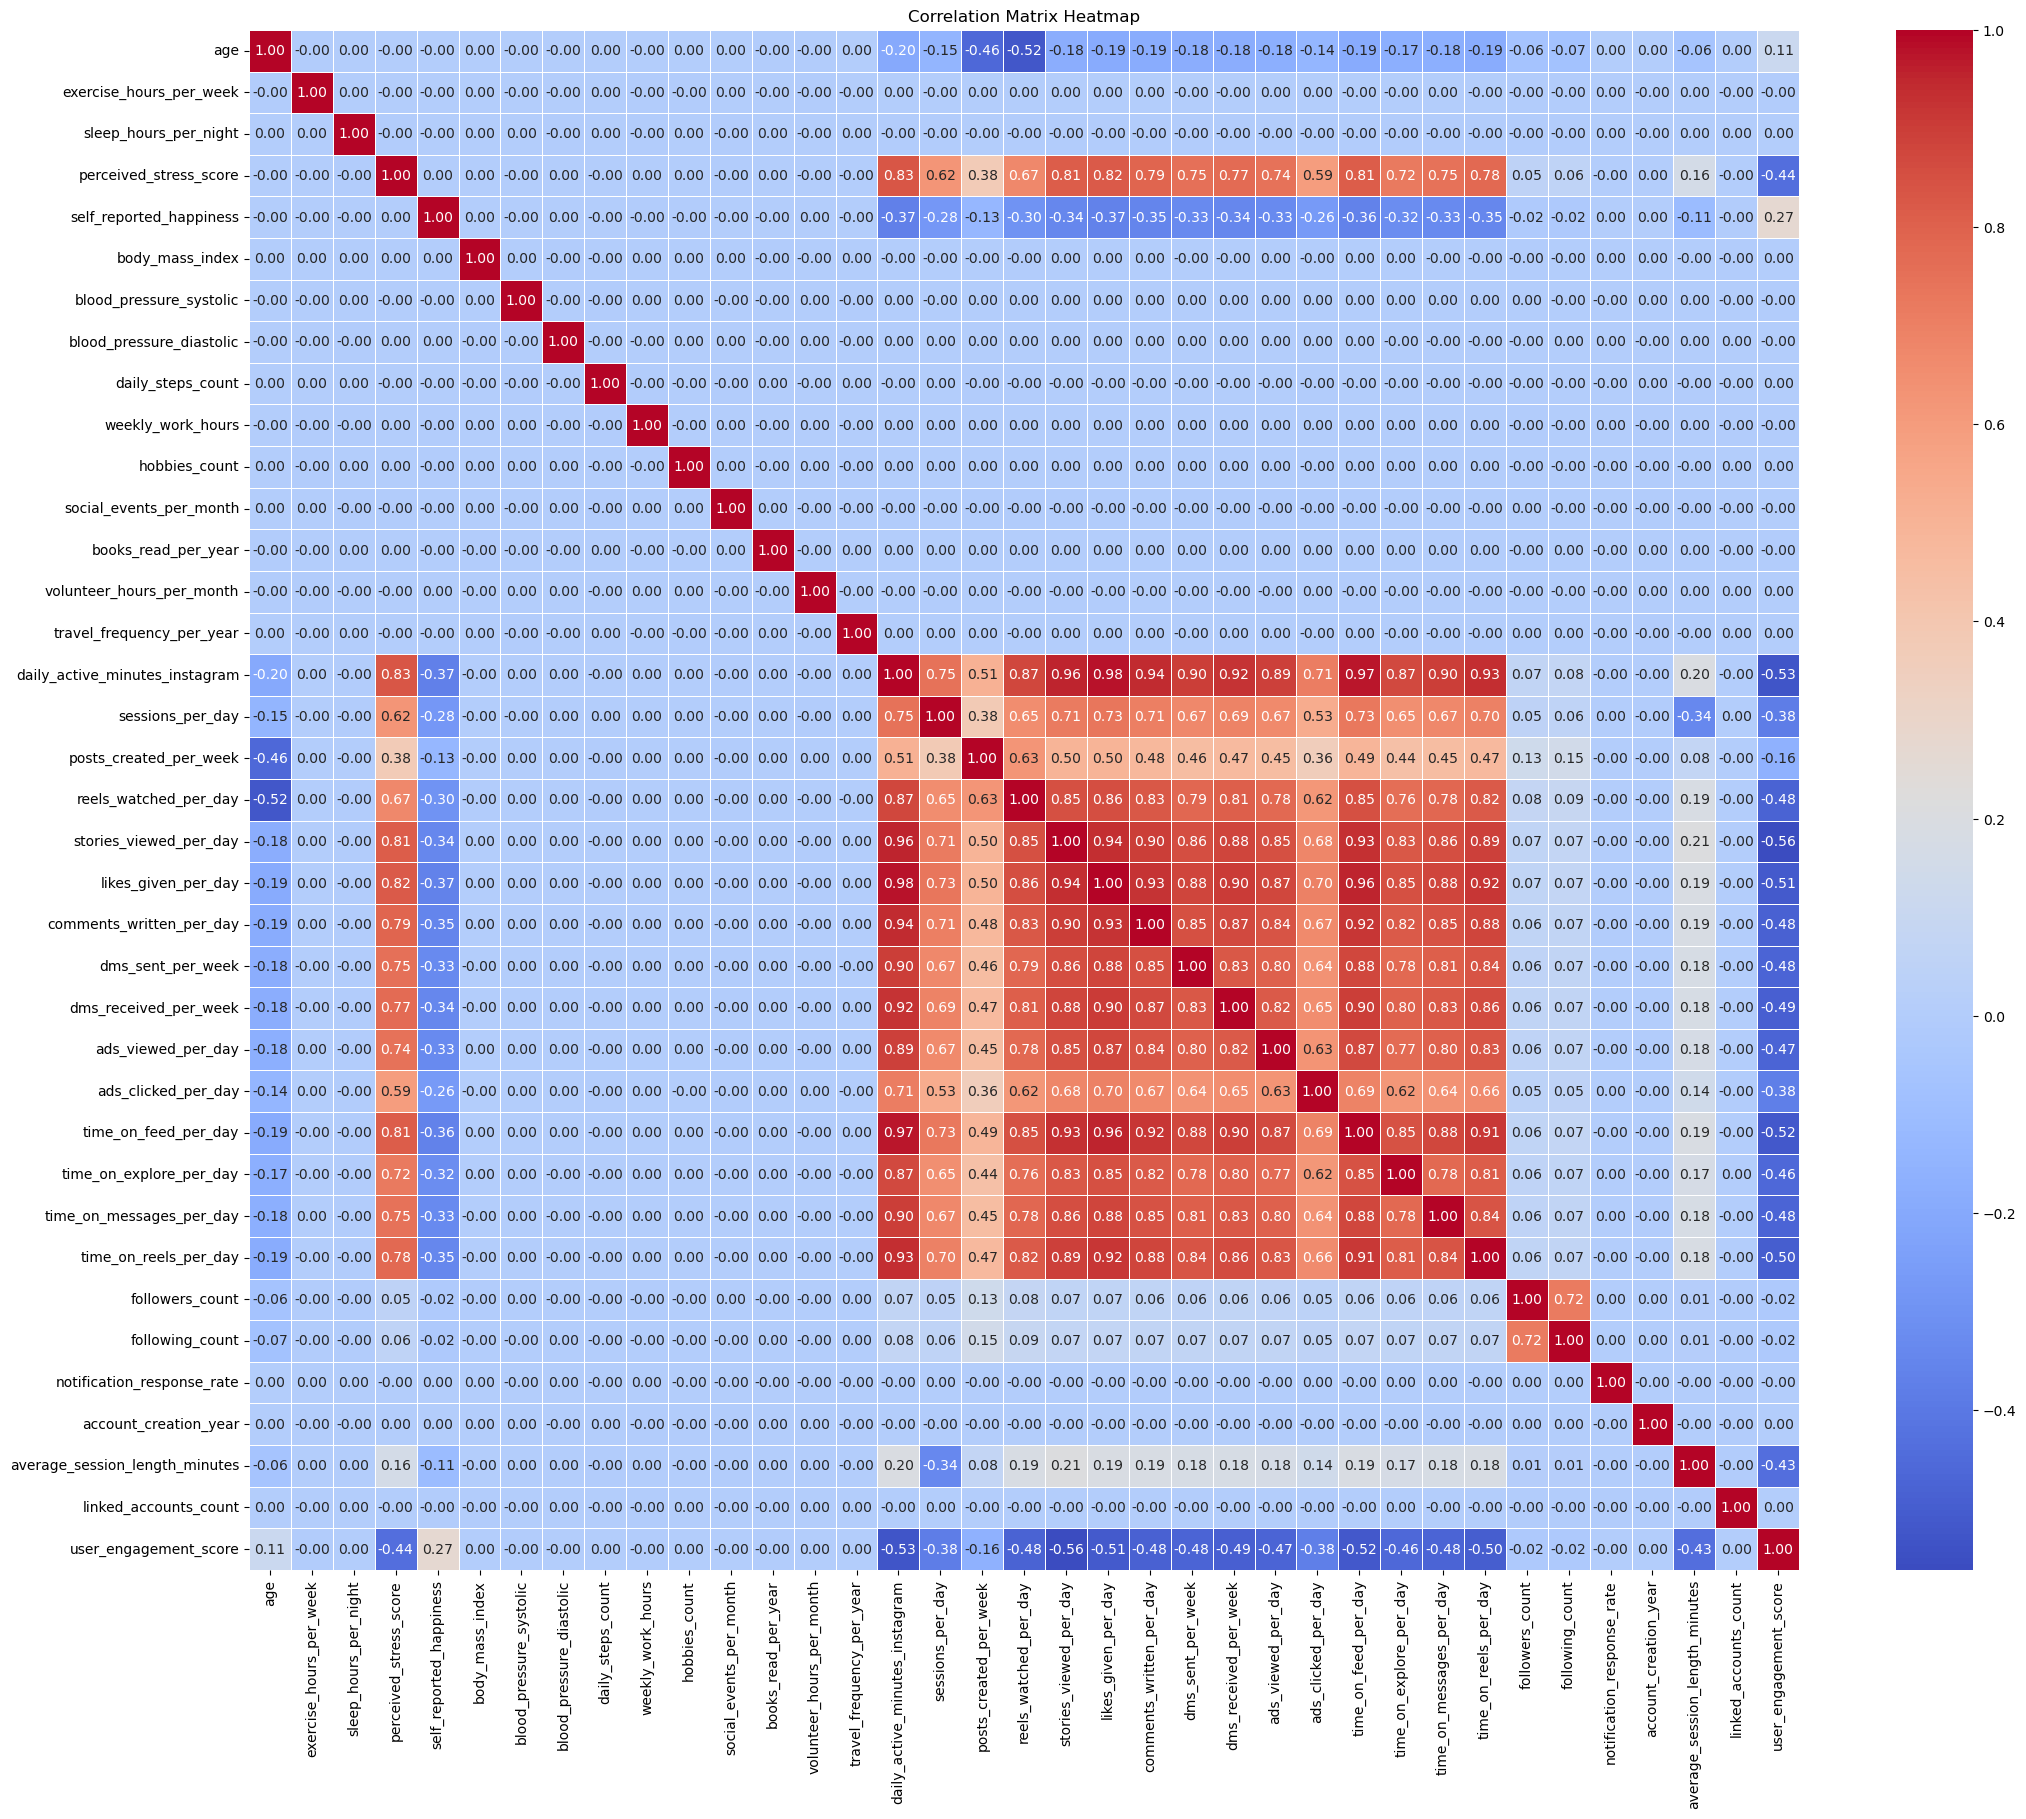

In [145]:
plt.figure(figsize=(25, 20))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

This reveals some interesting potential relationships. 

For users, a lower perceived stress score is associated with higher user engagement score and vice versa. Self-reported happiness is somewhat correlated with user engagement score.

It looks like older users create fewer posts and watch fewer reels per day than their younger counterparts.

All of the Instagram activities are highly correlated with each other, but creating posts is less strongly correlated with viewing the feed, reels, ads, etc. than the other features are with each other.

There is clearly a high positive correlation between Instagram usage metrics and perceived stress score; users who spend more time per day on Instagram report higher stress. Daily active minutes spent, stories viewed per day, likes given per day, and time on feed per day are all especially associated with higher stress. Posts created per week is associated with higher stress levels too, but to a much smaller degree than all of the content consumption metrics. 

Self-reported happiness scores are lower for heavier users of Instagram, and posts created per week is less associated with decreased happiness than the other metrics (although there is still a correlation).

So Instagram use is associated with higher stress and lower happiness, but we don't know how much using the app may cause or worsen these effects or whether people who are less mentally healthy tend to get addicted to Instagram, or what other factors may be at play. 

This also does not mean there is no way to spend time on Instagram without negative health effects. I would guess that there is a subgroup of users who are content creators who are also able to limit their time on the app, and that they are not as "stressed out," maybe in part because they're not consuming content as compulsively.

For the 4095 users who post 20 times per week or more, the self-reported happiness level and percieved stress score are related and lower perceived stress is associated with higher user engagement score. The correlations between amount of time spent on Instagram' features and stress and lower happiness are still present, though.

For users who post 7x per week and spent less than 30 minutes a day on Instagram, there is no relationship between Instagram time and stress or happiness.

In [186]:
#creators_df = df[(df['posts_created_per_week'] >= 7) & (df['daily_active_minutes_instagram'] < 30)]
#creators_df = df[df['daily_active_minutes_instagram'] < 30]
creators_df = df[df['posts_created_per_week'] >= 20]

In [187]:
creators_df.describe()

,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,weekly_work_hours,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
count,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,...,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0,4095.0
mean,18.567033,7.086374,6.988474,27.666911,4.789499,25.033162,124.879609,79.716728,7999.55116,40.008718,...,59.340904,51.551404,89.792674,4009.989011,4059.438339,0.495072,2017.424176,21.677851,1.967766,1.160315
std,3.959225,3.944285,1.098798,8.46542,2.781426,3.948379,20.373885,11.521368,88.402916,9.968106,...,22.308798,17.617683,27.297905,6547.197638,3345.147251,0.286803,4.639158,7.80558,1.342054,0.452272
min,13.0,0.1,3.1,0.0,1.0,15.0,90.0,60.0,7662.0,3.9,...,1.0,1.0,1.0,50.0,35.0,0.0,2010.0,5.0,0.0,0.83
25%,16.0,4.0,6.2,22.0,2.0,22.4,107.0,70.0,7940.0,33.0,...,43.0,38.0,70.0,998.5,1229.5,0.25,2013.0,15.0,1.0,1.07
50%,18.0,6.6,7.0,29.0,4.0,25.1,125.0,80.0,8001.0,40.1,...,57.0,49.0,86.0,2189.0,2872.0,0.5,2017.0,21.5,2.0,1.14
75%,21.0,9.6,7.7,35.0,7.0,27.6,142.0,90.0,8059.0,46.9,...,74.0,62.0,107.0,4585.5,6560.5,0.74,2022.0,28.45,3.0,1.21
max,63.0,21.0,10.0,40.0,10.0,38.6,159.0,99.0,8326.0,74.5,...,142.0,128.0,222.0,191332.0,10000.0,1.0,2025.0,39.0,5.0,18.0


In [188]:
creators_corr_matrix = creators_df.corr(numeric_only = True)

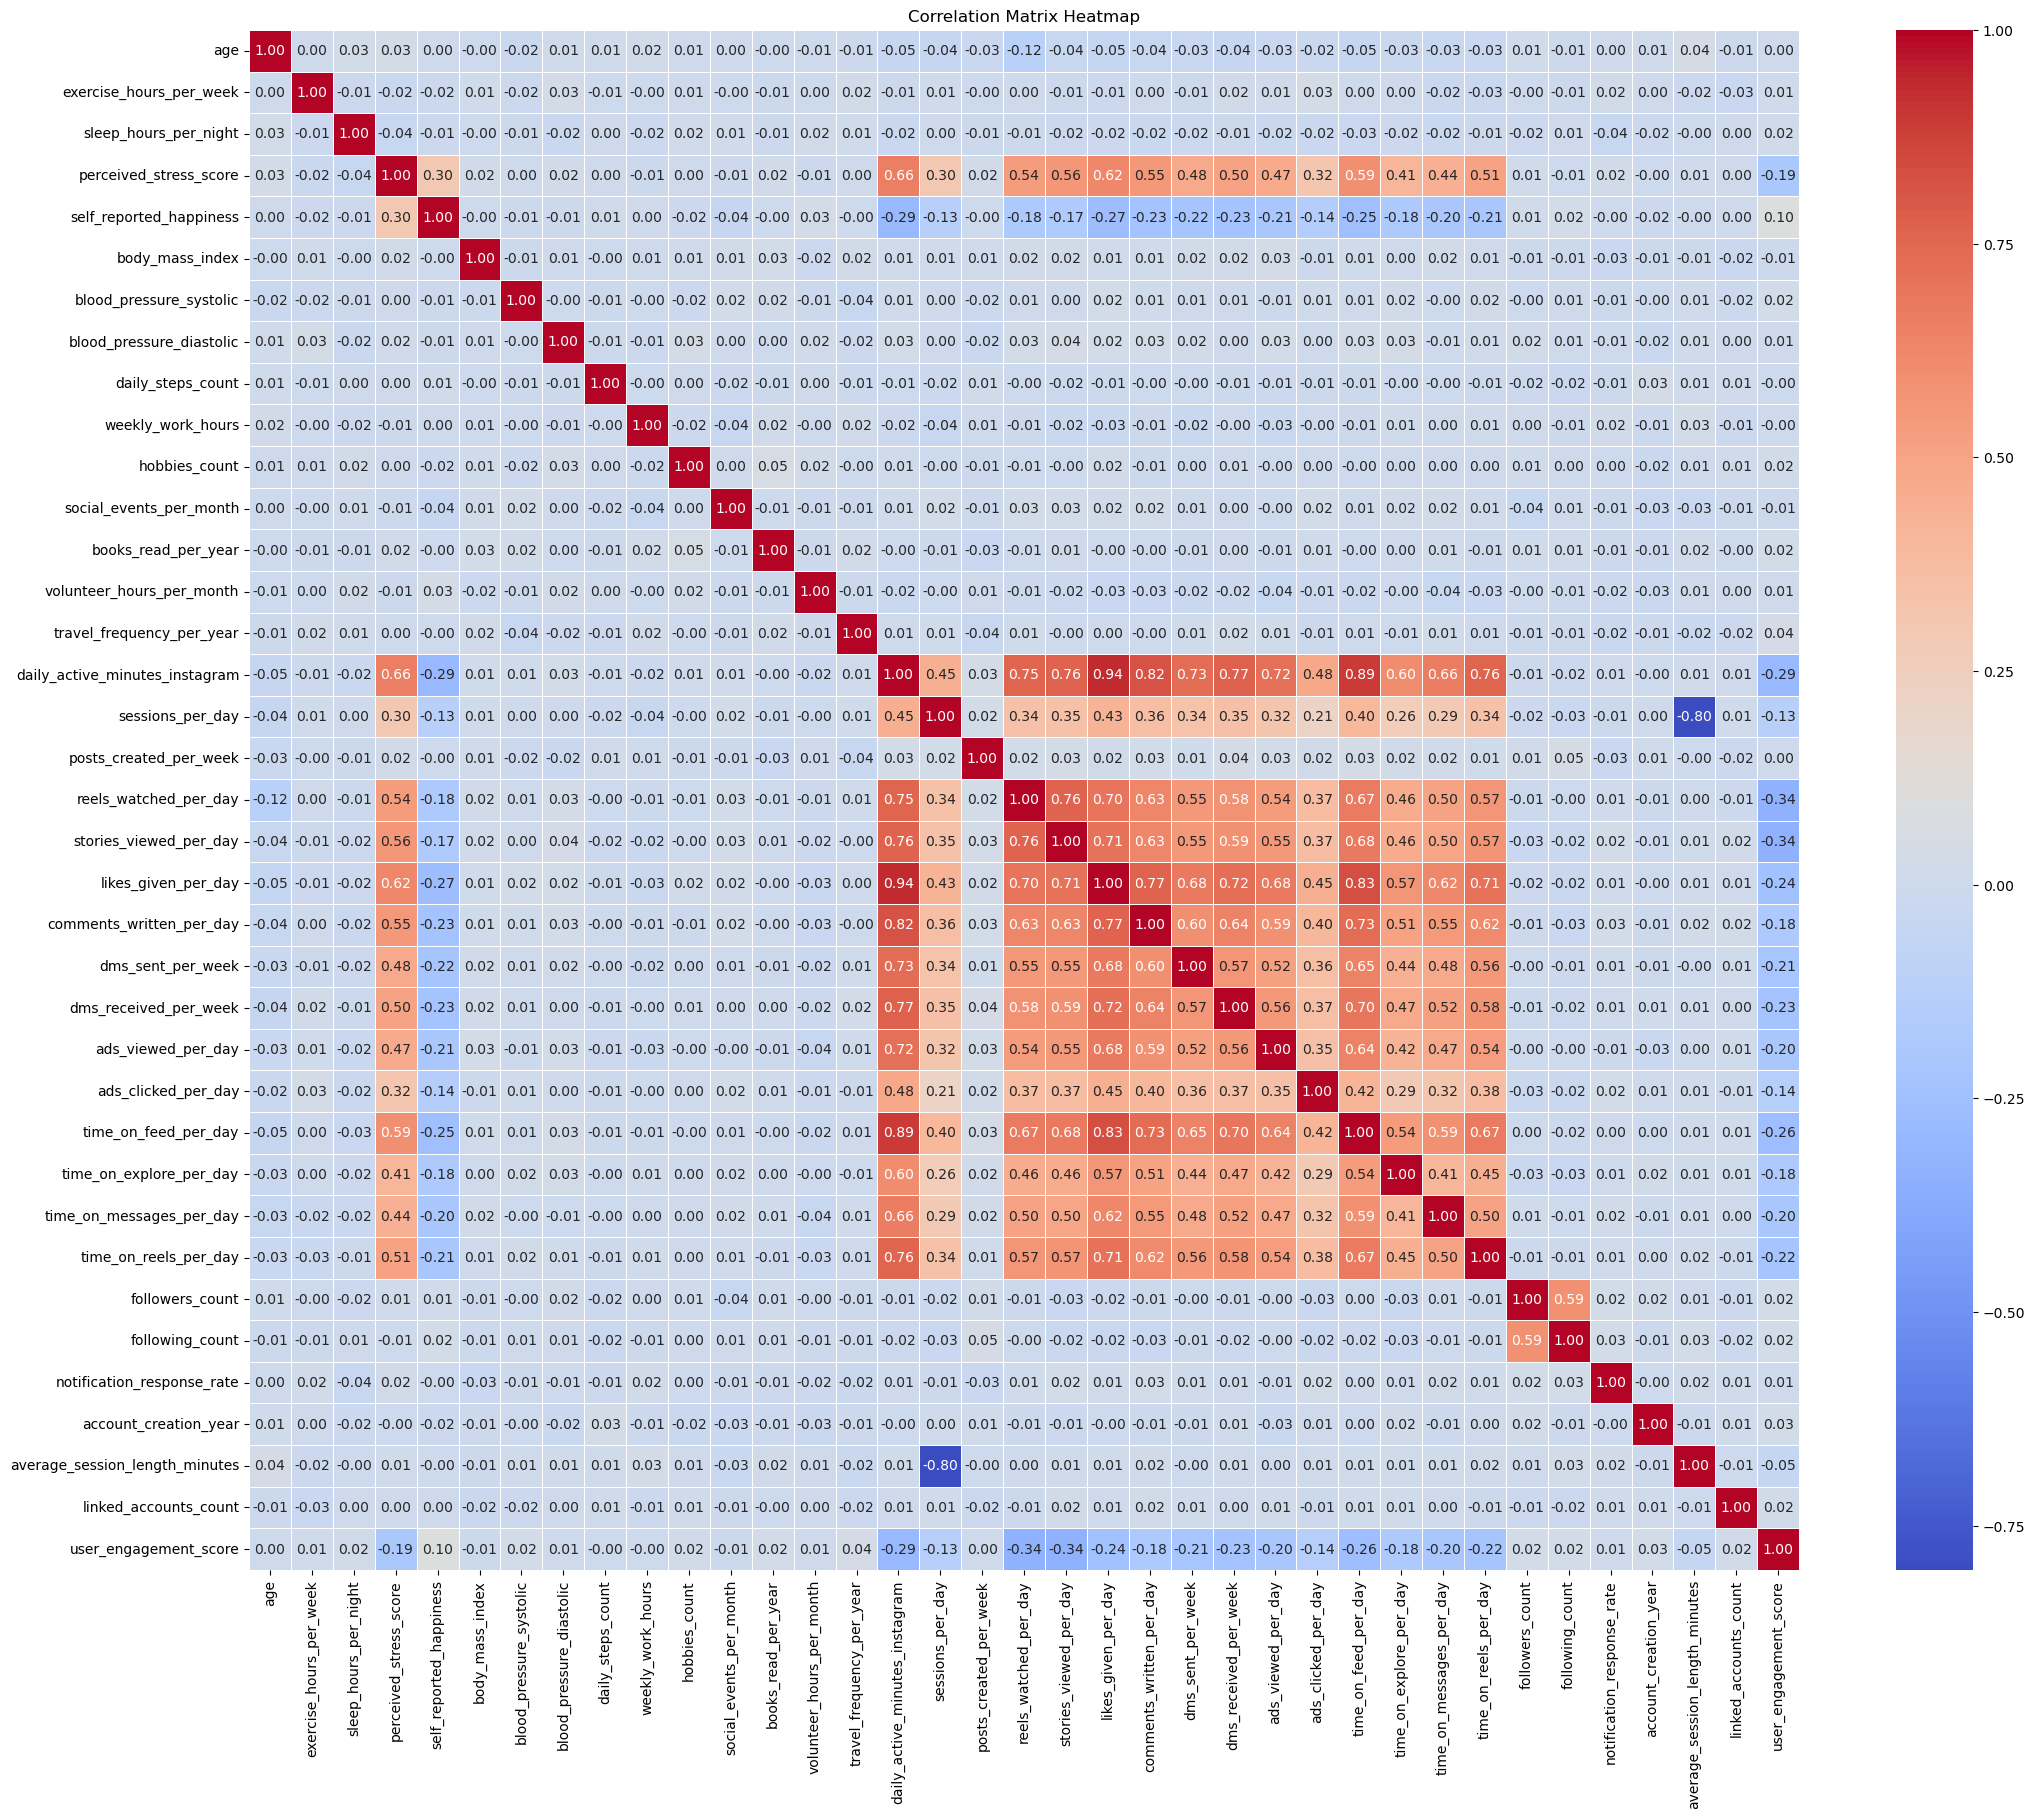

In [189]:
plt.figure(figsize=(25, 20))
sns.heatmap(creators_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

And here is another graph to show the relationship between posts per week and perceived stress score across different ages.

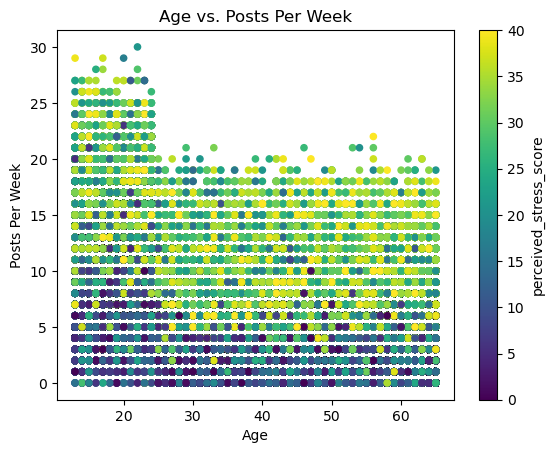

In [191]:
df.plot.scatter(x='age', y='posts_created_per_week', c='perceived_stress_score', colormap='viridis')

plt.title('Age vs. Posts Per Week')
plt.xlabel('Age')
plt.ylabel('Posts Per Week')
plt.show()

## Conclusions and Next Steps

From this brief exploration we determined which countries have the most Instagram users, some trends in the app's user base (what kinds of people are spending the most time/attention per day), which features are the most popular, and some correlations between Instagram use and users' characteristics or lifestyles. 

In particular, the data seem to confirm that heavy or compulsive social media consumption is associated with higher stress levels and lower self-reported happiness scores. 

For nexts steps we could design some tests to determine how much frequent posters differ from the rest of the user base, and even use a clustering algorithm to identify and study different types of users. We could explore the other features included in the dataset, such as premium features (which may be associated with higher income or other user characteristics) and predict ad clicks.